# Harmonic-Percussive Source Separation

Based on the paper at <a href = "https://www.researchgate.net/profile/Derry-Fitzgerald/publication/254583990_HarmonicPercussive_Separation_using_Median_Filtering/links/00b495396ef03235af000000/Harmonic-Percussive-Separation-using-Median-Filtering.pdf">this link</a>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal
from scipy.io import wavfile
from dsp import *
import warnings
warnings.filterwarnings("ignore")

44100


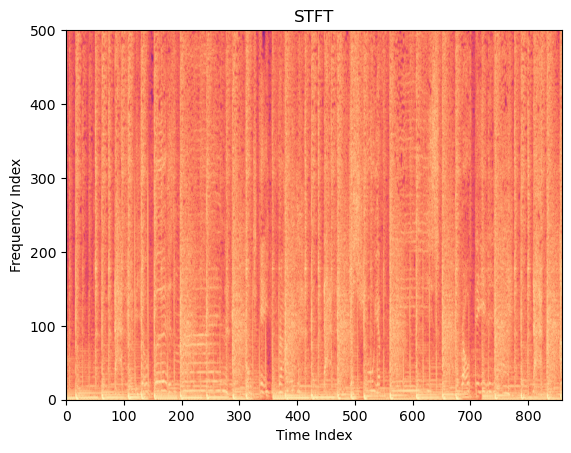

In [2]:
sr, x = wavfile.read("mj.wav")
print(sr)
win = 2048
hop = 512

S = stft(x, win, 512)
plt.imshow(amplitude_to_db(np.abs(S)), cmap='magma', aspect='auto')
plt.xlabel("Time Index")
plt.ylabel("Frequency Index")
plt.ylim([0, 500])
plt.title("STFT")

ipd.Audio(x, rate=sr)

## Median filtering

Suppose I had a simple function f(x) = x, corrupted by random "salt"



In [ ]:
x = np.arange(100)
y = np.array(x)
num_corrupted = 10
y[np.random.randint(0, y.size, num_corrupted)] = 100*np.random.randn(num_corrupted)

z = np.zeros_like(y)
w = 5
for i in range(len(y)):
    # Pull out a window between [i-w, i+w]
    yi = y[max(0, i-w):min(i+w+1, len(y))]
    z[i] = np.median(yi)
plt.plot(x, y)
plt.plot(x, z)
plt.legend(["y", "z"])

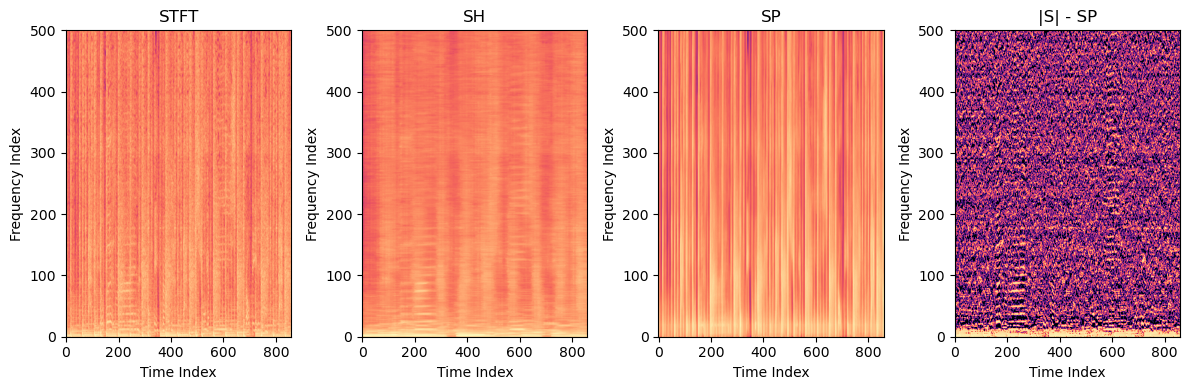

In [7]:
sr, x = wavfile.read("mj.wav")
win = 2048
hop = 512

S = stft(x, win, hop)

med_win = 20

# Do a median filter horizontally
SH = signal.medfilt(np.abs(S), [1, 2*med_win+1])

SP = signal.medfilt(np.abs(S), [2*med_win+1, 1])

plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(amplitude_to_db(np.abs(S)), cmap='magma', aspect='auto')
plt.xlabel("Time Index")
plt.ylabel("Frequency Index")
plt.ylim([0, 500])
plt.title("STFT")

plt.subplot(142)
plt.imshow(amplitude_to_db(SH), cmap='magma', aspect='auto')
plt.xlabel("Time Index")
plt.ylabel("Frequency Index")
plt.ylim([0, 500])
plt.title("SH")

plt.subplot(143)
plt.imshow(amplitude_to_db(SP), cmap='magma', aspect='auto')
plt.xlabel("Time Index")
plt.ylabel("Frequency Index")
plt.ylim([0, 500])
plt.title("SP")

plt.subplot(144)
plt.imshow(amplitude_to_db(np.abs(S) - SP), cmap='magma', aspect='auto')
plt.xlabel("Time Index")
plt.ylabel("Frequency Index")
plt.ylim([0, 500])
plt.title("|S| - SP")

plt.tight_layout()

In [ ]:
yh = griffin_lim(SH, win, hop, blackman_harris_window, 10)
#yh = istft(SH, win, hop)

In [ ]:
ipd.Audio(yh, rate=sr)

In [ ]:
yp = griffin_lim(SP, win, hop, blackman_harris_window, 10)
ipd.Audio(yp, rate=sr)

In [8]:
yhw = istft(S*(SH/(SH+SP)), win, hop)
ipd.Audio(yhw, rate=sr)

In [9]:
yhp = istft(S*(SP/(SH+SP)), win, hop)
ipd.Audio(yhp, rate=sr)

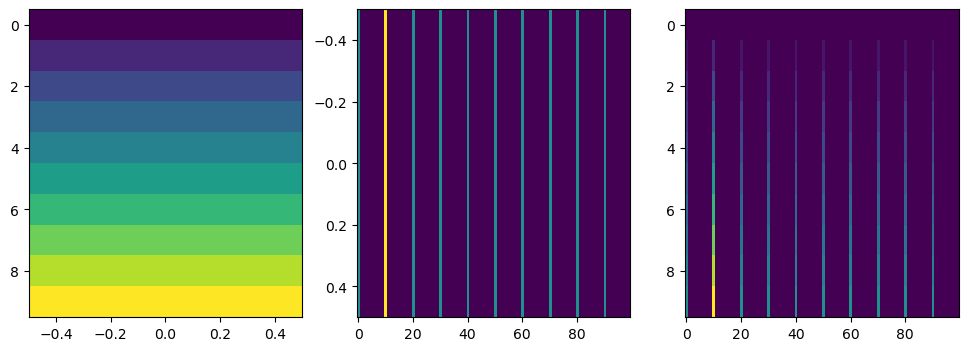

In [19]:
W = np.arange(10)[:, None]
H = np.zeros((1, 100))
H[0, 0::10] = 1
H[0, 10] = 2

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(W, interpolation='none', aspect='auto')
plt.subplot(132)
plt.imshow(H, interpolation='none', aspect='auto')
plt.subplot(133)
plt.imshow(W.dot(H), interpolation='none', aspect='auto')
